# **ch.06 비지도 학습**  
## 06-3 주성분 분석  
### 풀어야 할 문제:  
> ### data set의 크기가 커지면(data가 많아지면) storage 부족 등 여러 문제가 발생할 수 있다. clustering이나 classification에 영향을 끼치지 않으면서 image data를 압축하라  
### *차원과 차원 축소*  
dimension: data의 feature  
fruits data set의 경우 한 sample 당 10,000개의 pixel이 있으므로, 10,000개의 feature를 가지고 있음  
&rarr; 10,000개의 dimension  
이 dimension을 줄일 수 있다면 storage를 크게 절약할 수 있을 것


multi-dimension array에서와 1 dimsension array에서의 dimension은 다른 의미  
multi-dimensio에서의 dimension은 axis 개수  
1 dimension에서의 dimension은 element의 개수


dimension을 줄이기 위해 unsupervised learning 중 하나인 dimensionality reduction algorithm을 활용  
dimensionality reduction은 data를 가장 잘 나타내는 일부 feature(dimension)를 선택하여 data size를 줄이고 supervised learning model의 performance를 향상시킬 수 있음  
또한 줄어든 dimension에서 다시 raw dimension으로 loss를 최소화하며 reconstruct할 수 있음


### *주성분 분석 소개*  
principal component analysis(PCA)
+ 대표적인 dimensionality reduction algorithm
+ data의 variance가 큰 방향을 찾는 것으로 이해할 수 있음
    + variance가 큰 방향: data를 잘 표현하는 어떤 vector  
    &rarr; 이러한 vector를 principal component
+ principal component는 raw data에 있는 어떤 방향  
$\therefore$ principal component vector의 element 개수는 raw data의 feature 개수와 같음
+ raw data는 principal component를 사용해 dimension을 줄일 수 있음  
(sample data를 principal component vector에 직각으로 투영하여)
+ principal component는 raw dimension과 같고 pricipal component로 변환한 data는 dimension이 줄어듦


principal component는 가장 variance가 큰 방향이기에 principal component vector에 투영하여 바꾼 data는 raw data가 가진 특성을 잘 나타낼 것

PCA 동작
+ variance가 가장 큰 방향으로 첫 번째 principal component 찾음
+ 이 vector에 수직이고 variance가 가장 큰 다음 principal component를 찾음
+ 위 과정을 반복함


일반적으로 principal component는 raw feature의 개수만큼 찾을 수 있음


### *PCA 클래스*  
sciki-learn으로 fruits image data에서 PCA 수행
+ 데이터 준비하기

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

wget: command not found


In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

+ train PCA class  
(n_components parameter에 principal component 개수 지정)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)

pca.fit(fruits_2d)

PCA(n_components=50)

PCA가 찾은 principal component는 components_ attribute에 저장되어 있음  
components_에 저장된 array size확인

In [4]:
print(pca.components_.shape)

(50, 10000)


n_components parameter를 50으로 지정했기에 첫 번째 dimension은 50  
즉, 50개의 principal component를 찾은 것  
두 번째 dimension은 feature 개수와 같은 10,000


raw data와 dimension이 같으므로 principal component를 100x100 크기의 image로 출력할 수 있음  
draw_fruits() function으로 그려보기

In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n: the number of samples
    rows = int(np.ceil(n/10))    # 한 줄에 10개씩 이미지 출력, n을 10으로 나누어 row 수 계산
    cols = n if rows<2 else 10    # row가 1개이면 coloumn 수는 sample의 개수, 그렇지 않으면 10개
    
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j < n:
                axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

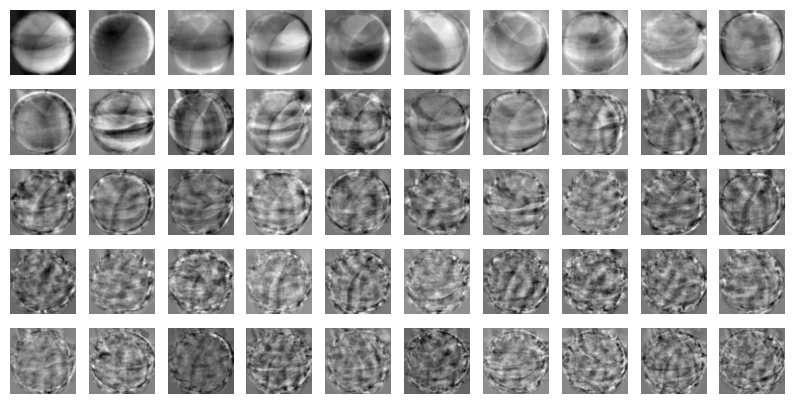

In [6]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 principal components는 raw data에서 가장 variance가 큰 방향을 순서대로 나타낸 것  
&rarr; data set에 있는 어떤 특징을 잡아낸 것으로 생각할 수 있음  


principal components를 찾았으므로, raw data를 principal component에 투영하여 feature 개수를 10,000에서 50으로 줄일 수 있음  
&rarr; raw data를 각 principal component로 분해하는 것으로 생각할 수 있음


PCA class의 transfrom() method를 사용해 raw data의 dimension을 50으로 줄이기

In [7]:
fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)

(300, 50)


(300, 10000)의 array였던 fruits_2d를 (300, 50)의 array로 변환  
1/200으로 줄어듦


### *원본 데이터 재구성*  
앞서 10,000개의 feature를 50개로 줄임 
이로 인해 loss가 발생할 수 밖에 없음  
하지만, variance가 최대한 큰 방향으로 data를 투영했기에 raw data 상당 부분을 reconstruct할 수 있을 것  
PCA class는 reconstruct를 위해 inverse_transform() method를 제공  


fruits_pca data를 inverse_transform()에 입력하여 10,000개의 feature 복원

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)

print(fruits_inverse.shape)

(300, 10000)


reconstruct한 data를 100x100 으로 reshape하고, 100개씩 나누어 image로 출력

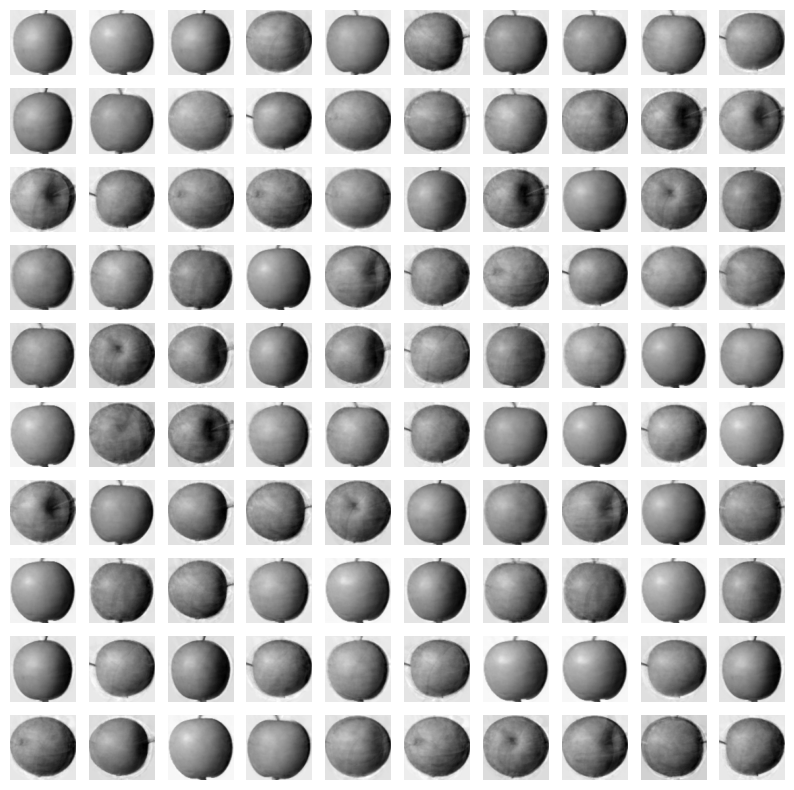

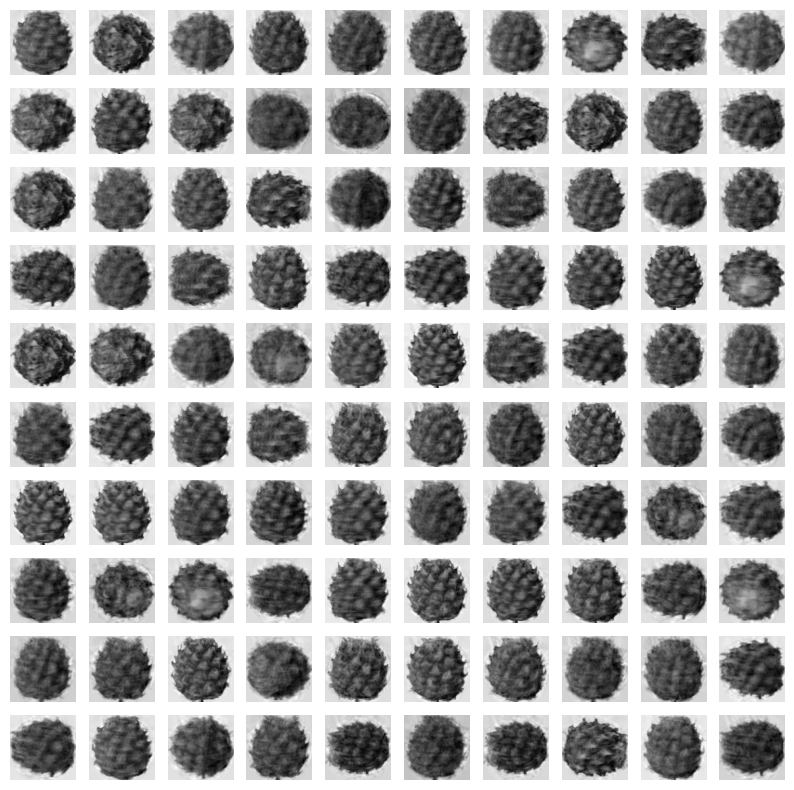

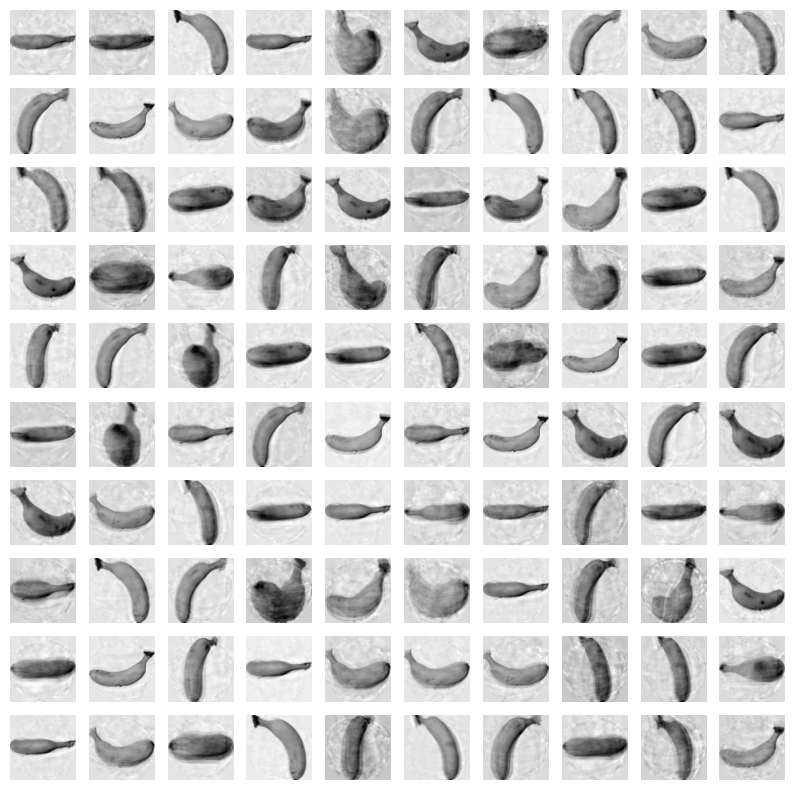

In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

거의 모든 과일이 잘 복원됨  
일부 흐리고 번진 부분이 있지만, 50개의 feature를 10,000개로 늘린 것을 감안하면 잘 복원된 것  
$\because$ 50개의 feature가 variance를 잘 보존하도록 변환된 것


그렇다면 50개의 feature는 얼마나 variance를 잘 보존하고 있는 것일까?


### *설명된 분산*  
principal component가 raw data의 variance를 얼마나 잘 나타내는지 기록한 value를 explained variance라고 함


PCA class의 explained_variance_ratio_ attribute에 각 principal component의 explained variance의 ratio가 저장되어 있음  
이 ratio를 모두 더하면 50개의 principal component로 표현하고 있는 total variance ratio를 얻을 수 있음


total variance ratio 확인

In [11]:
print(np.sum(pca.explained_variance_ratio_))

0.921430662237766


92%가 넘는 variance를 유지하고 있음  
앞서 fruits_reconstruct data로 image를 출력했을 때 quality가 높았던 이유를 알 수 있음  


explained variance ratio를 graph로 그려보면 적절한 principal component의 개수를 찾는 데 도움이 됨


matplotlib plot() function으로 explained variance ratio graph 그리기

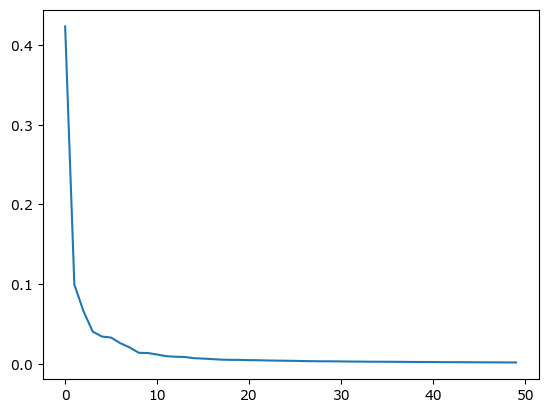

In [12]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

graph를 보면 처음 10개의 principal component이 대부분의 variance를 표현하고 있음  
그 다음부터는 각 principal component가 explain하고 있는 variance는 비교적 작음


### *다른 알고리즘과 함께 사용하기*  
raw data로 supervised model을 training한 결과와 PCA로 dimensionality reduced data로 training한 결과 비교해보기  
+ 3개의 과일 사진을 classify해야 하므로, logistic regression model 사용

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

+ supervised learning model을 사용하려면 target data가 있어야 함  
사과를 0, 파인애플 1, 바나나 2로 지정하여 list로 target data 만들기

In [22]:
target = np.array([0]*100+[1]*100+[2]*100)

+ raw data인 fruits_2d를 사용하여 logistic regression model에 대한 cross validation 수행  
test score와 fit time 확인

In [23]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.4099083423614502


+ PCA로 dimensionality reduction을 진행한 fruits_pca를 사용하여 logistic regression model에 대한 cross validation 수행  
test score와 fit time 확인

In [24]:
scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.0060760498046875


50개의 feature만 사용했는데도 accuracy 1.0에 training time(fit time)은 0.0061로 60배 이상 감소했음  
PCA로 train set의 dimension을 축소하면 storage 확보 뿐만 아니라 model의 training speed도 높일 수 있음


PCA class를 사용할 때 n_components parameter에 principal component 개수를 지정했음  
PCA class는 principal component 개수를 지정하는 대신 explained variance ratio를 전달할 수도 있음  
&rarr; PCA class는 지정된 ratio에 도달할 때까지 자동으로 principal component를 찾음


explained variance ratio를 0.5로 지정하여 PCA model 만들고 PCA 수행

In [25]:
pca = PCA(n_components=0.5)

pca.fit(fruits_2d)

PCA(n_components=0.5)

PCA model이 몇 개의 principal component을 찾았는지 확인

In [28]:
print(pca.n_components_)

2


2개의 feature만으로 raw data의 variance의 50%를 표현할 수 있음


이 model로 raw data 변환하고, shape 확인

In [30]:
fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)

(300, 2)


2개의 feature를 가진 furits_pca data로 logistic regression model에 대한 cross validation 수행

In [31]:
scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.008672094345092774


/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/p

2개 feature만 사용했는데도 0.99의 accuracy를 달성함


dimensionality reduction data를 사용해 k-mean algorithm으로 cluster 찾기

In [32]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)

km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


raw data를 사용해 cluster를 찾았을 때와 비슷한 결과


k-means model이 찾은 label을 사용해 과일 image 출력

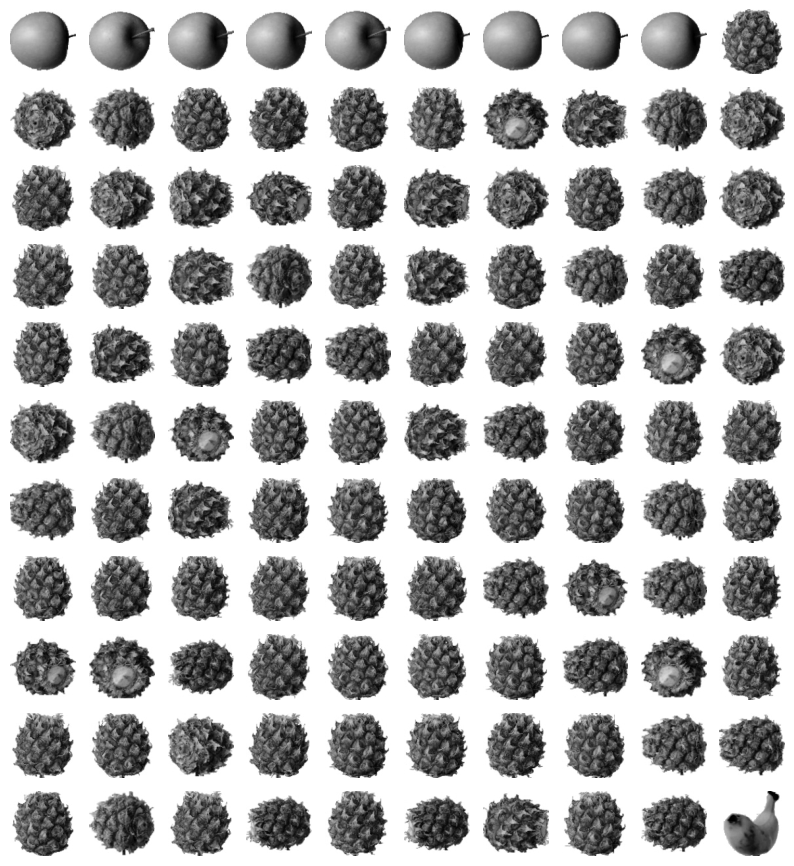

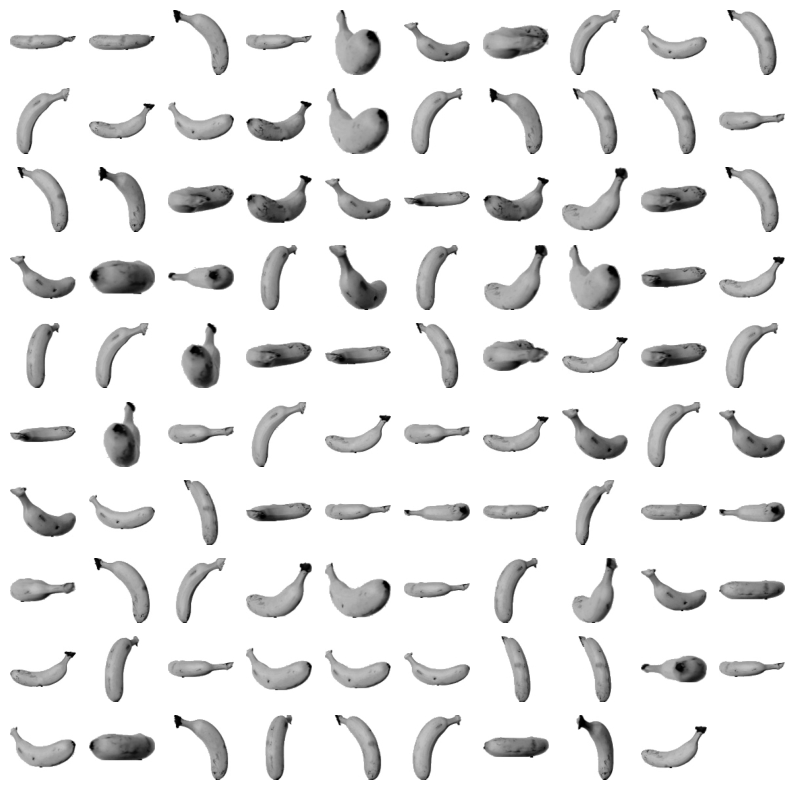

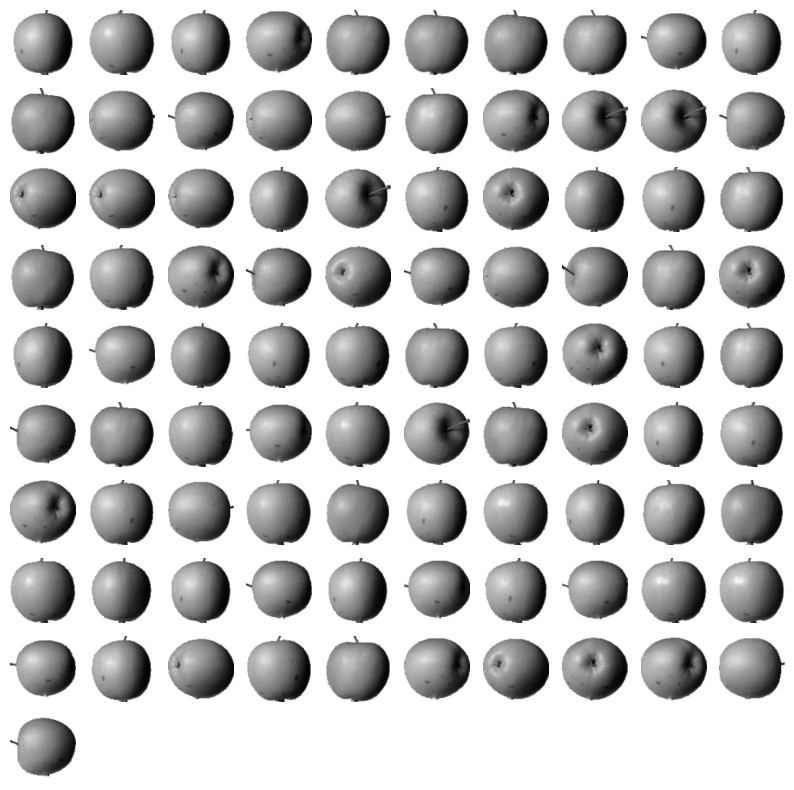

In [33]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

train set의 dimensionality를 reduce하면 visualization에 용이  
3개 이하로 diemsion을 줄이면 출력하기 비교적 쉬움  


km.labels_를 사용해 cluster별로 scatter 그리기

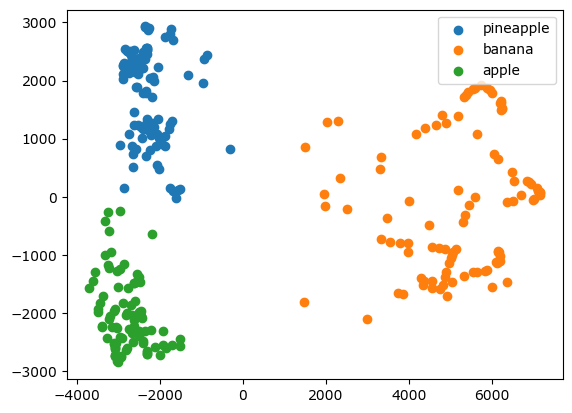

In [34]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

each cluster의 scatter가 잘 구분됨  
2개 feature만 사용했는데도 logistic regression model의 cross validation score가 0.99를 넘은 이유를 알 수 있음  


위 scatter를 보면 사과와 파인애플 cluster의 경계가 가깝게 붙어 있음  
&rarr; 두 cluster의 sample은 혼동을 일으키기 쉬울 것


이렇게 data를 visualization하면 예상치 못한 insight를 얻을 수 있기에 dimensionality reduction은 매우 유용한 tool임